# 1 加载数据

## 1.1 导入数据

In [3]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 50)

# 读取数据
df = pd.read_csv('../datasets/walmart.csv')

## 1.2 查看数据基本信息

In [4]:
# 查看数据基本信息
print("数据集形状:", df.shape)
print("\n数据集前5行:")
print(df.head())

# 查看数据类型
print("\n数据类型信息:")
print(df.info())

数据集形状: (550068, 10)

数据集前5行:
   User_ID Product_ID Gender   Age  Occupation City_Category Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase
0  1000001  P00069042      F  0-17          10             A                          2               0                 3      8370
1  1000001  P00248942      F  0-17          10             A                          2               0                 1     15200
2  1000001  P00087842      F  0-17          10             A                          2               0                12      1422
3  1000001  P00085442      F  0-17          10             A                          2               0                12      1057
4  1000002  P00285442      M   55+          16             C                         4+               0                 8      7969

数据类型信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
--

In [5]:
# 查看数据统计摘要
print("\n数据统计摘要:")
print(df.describe())


数据统计摘要:
            User_ID     Occupation  Marital_Status  Product_Category       Purchase
count  5.500680e+05  550068.000000   550068.000000     550068.000000  550068.000000
mean   1.003029e+06       8.076707        0.409653          5.404270    9263.968713
std    1.727592e+03       6.522660        0.491770          3.936211    5023.065394
min    1.000001e+06       0.000000        0.000000          1.000000      12.000000
25%    1.001516e+06       2.000000        0.000000          1.000000    5823.000000
50%    1.003077e+06       7.000000        0.000000          5.000000    8047.000000
75%    1.004478e+06      14.000000        1.000000          8.000000   12054.000000
max    1.006040e+06      20.000000        1.000000         20.000000   23961.000000


In [6]:
# 查看每列唯一值数量
print("\n每列唯一值数量:")
print(df.nunique())


每列唯一值数量:
User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64


In [7]:
# 检查缺失值
print("\n缺失值数量:")
print(df.isnull().sum())


缺失值数量:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


# 2 数据预处理

## 2.1 检查并处理重复行

In [8]:
print("重复行数量:", df.duplicated().sum())
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print("删除重复行后数据集形状:", df.shape)

重复行数量: 0


## 2.2 处理分类特征的编码

In [9]:
# 将性别编码为数值型
df['Gender_Code'] = df['Gender'].map({'M': 1, 'F': 0})

# 将年龄组转换为有序分类变量
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
df['Age_Category'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# 将城市类别编码为数值
df['City_Code'] = df['City_Category'].map({'A': 0, 'B': 1, 'C': 2})

# 处理停留年限字段
df['Stay_Years'] = df['Stay_In_Current_City_Years'].replace('4+', '4')
df['Stay_Years'] = pd.to_numeric(df['Stay_Years'])

## 2.3 特征工程

In [10]:
# 根据用户ID计算每个用户的总购买金额
user_total_purchase = df.groupby('User_ID')['Purchase'].sum().reset_index()
user_total_purchase.rename(columns={'Purchase': 'Total_User_Purchase'}, inplace=True)
df = pd.merge(df, user_total_purchase, on='User_ID', how='left')

# 根据用户ID计算每个用户的购买次数
user_purchase_count = df.groupby('User_ID').size().reset_index(name='Purchase_Count')
df = pd.merge(df, user_purchase_count, on='User_ID', how='left')

# 计算用户的平均购买金额
df['Avg_User_Purchase'] = df['Total_User_Purchase'] / df['Purchase_Count']

# 根据产品类别计算平均购买金额
product_avg_purchase = df.groupby('Product_Category')['Purchase'].mean().reset_index()
product_avg_purchase.rename(columns={'Purchase': 'Avg_Category_Purchase'}, inplace=True)
df = pd.merge(df, product_avg_purchase, on='Product_Category', how='left')

## 2.4 归一化和标准化数值特征

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 归一化Purchase金额
scaler = MinMaxScaler()
df['Purchase_Normalized'] = scaler.fit_transform(df[['Purchase']])

# 标准化Purchase金额
std_scaler = StandardScaler()
df['Purchase_Standardized'] = std_scaler.fit_transform(df[['Purchase']])

## 2.5 检查预处理后的数据

In [12]:
print("\n预处理后的数据概览:")
print(df.head())
print("\n数据类型:")
print(df.dtypes)


预处理后的数据概览:
   User_ID Product_ID Gender   Age  Occupation City_Category Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  Gender_Code Age_Category  City_Code  Stay_Years  Total_User_Purchase  Purchase_Count  Avg_User_Purchase  Avg_Category_Purchase  Purchase_Normalized  Purchase_Standardized
0  1000001  P00069042      F  0-17          10             A                          2               0                 3      8370            0         0-17          0           2               334093              35        9545.514286           10096.705734             0.348992              -0.177973
1  1000001  P00248942      F  0-17          10             A                          2               0                 1     15200            0         0-17          0           2               334093              35        9545.514286           13606.218596             0.634181               1.181756
2  1000001  P00087842      F  0-17          10             A                

In [13]:
print("\n描述性统计:")
print(df.describe())


描述性统计:
            User_ID     Occupation  Marital_Status  Product_Category       Purchase    Gender_Code      City_Code     Stay_Years  Total_User_Purchase  Purchase_Count  Avg_User_Purchase  Avg_Category_Purchase  Purchase_Normalized  Purchase_Standardized
count  5.500680e+05  550068.000000   550068.000000     550068.000000  550068.000000  550068.000000  550068.000000  550068.000000         5.500680e+05   550068.000000      550068.000000          550068.000000        550068.000000           5.500680e+05
mean   1.003029e+06       8.076707        0.409653          5.404270    9263.968713       0.753105       1.042640       1.858418         1.925314e+06      216.403401        9263.968713            9263.968713             0.386320          -1.297937e-16
std    1.727592e+03       6.522660        0.491770          3.936211    5023.065394       0.431205       0.760211       1.289443         1.489901e+06      175.031150        1619.510567            4007.618709             0.209740        

## 2.6 保存预处理后的数据

In [14]:
df.to_csv('../datasets/walmart_preprocessed.csv', index=False)

# 3 数据可视化

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['font.family'] = 'SimHei'  # 或其他支持中文的字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

In [16]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set(font_scale=1.2)

C:\Users\avawa\AppData\Local\Temp\ipykernel_5600\3010520803.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [25]:
import os
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

## 3.1 购买金额分布

### 3.1.1 购买金额总体分布

Text(0, 0.5, '频率')

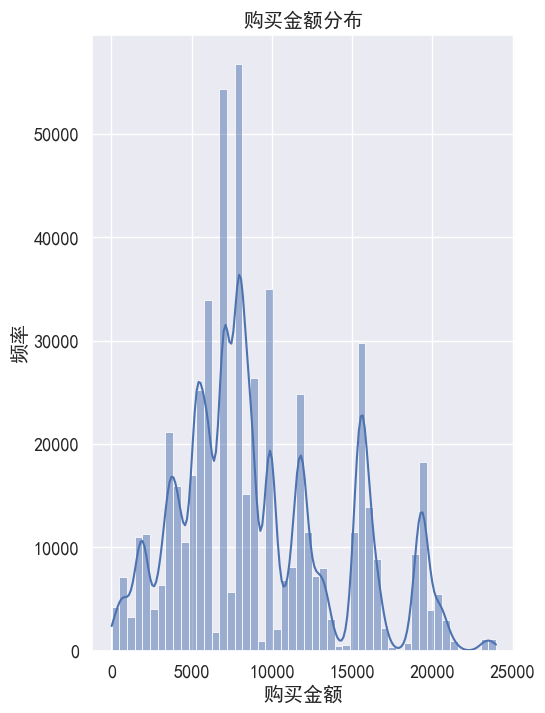

In [28]:
plt.subplot(1, 2, 1)
sns.histplot(df['Purchase'], kde=True, bins=50)
plt.title('购买金额分布')
plt.xlabel('购买金额')
plt.ylabel('频率')

### 3.2.2 购买金额箱线图

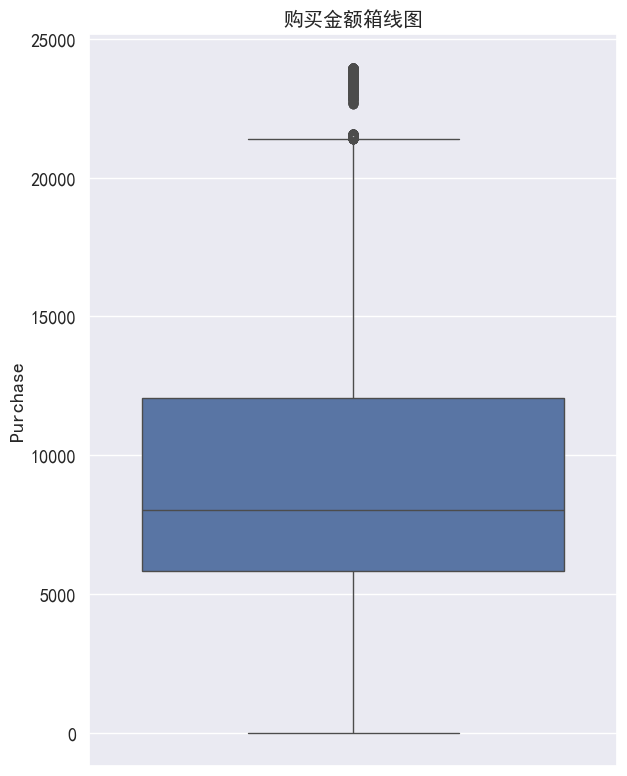

In [29]:
plt.subplot(1, 2, 2)
sns.boxplot(y='Purchase', data=df)
plt.title('购买金额箱线图')
plt.tight_layout()
plt.savefig('visualizations/purchase_distribution.png')
plt.show()

## 3.2 用户特征

C:\Users\avawa\AppData\Local\Temp\ipykernel_19128\530598770.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(['未婚', '已婚'])


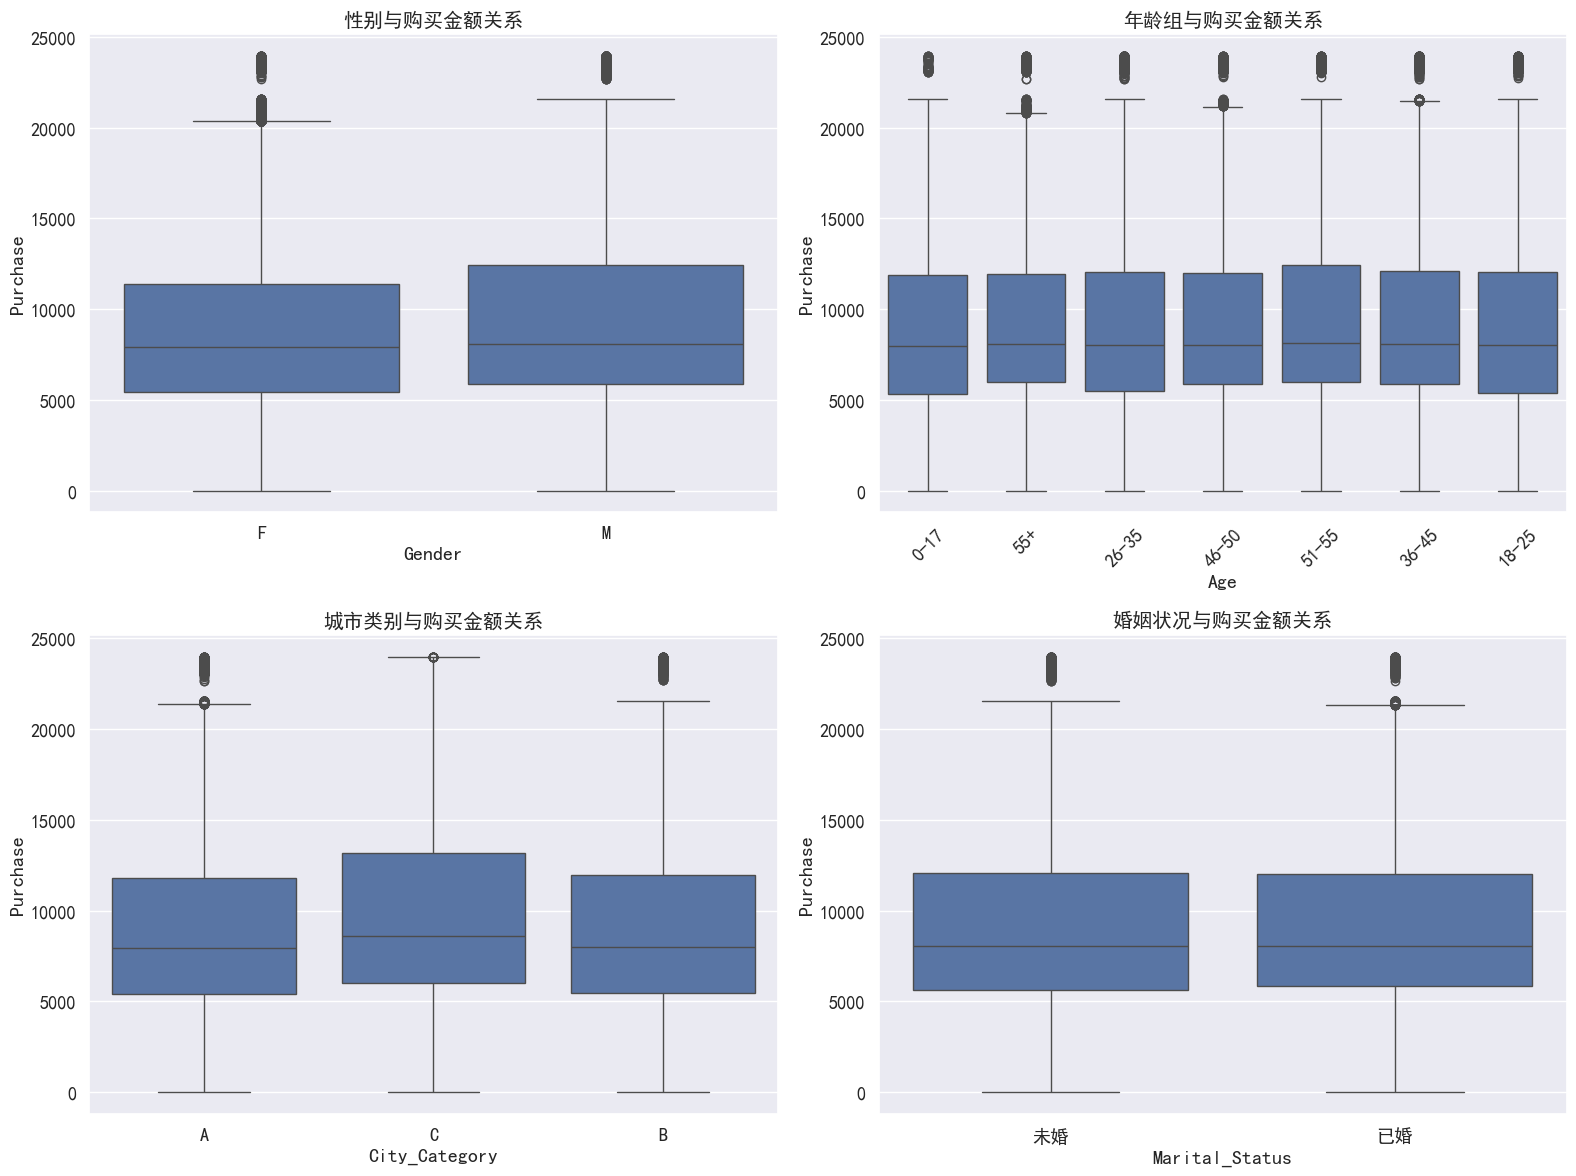

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 性别与购买金额关系
sns.boxplot(x='Gender', y='Purchase', data=df, ax=axes[0, 0])
axes[0, 0].set_title('性别与购买金额关系')

# 年龄组与购买金额关系
sns.boxplot(x='Age', y='Purchase', data=df, ax=axes[0, 1])
axes[0, 1].set_title('年龄组与购买金额关系')
axes[0, 1].tick_params(axis='x', rotation=45)

# 城市类别与购买金额关系
sns.boxplot(x='City_Category', y='Purchase', data=df, ax=axes[1, 0])
axes[1, 0].set_title('城市类别与购买金额关系')

# 婚姻状况与购买金额关系
sns.boxplot(x='Marital_Status', y='Purchase', data=df, ax=axes[1, 1])
axes[1, 1].set_title('婚姻状况与购买金额关系')
axes[1, 1].set_xticklabels(['未婚', '已婚'])

plt.tight_layout()
plt.savefig('visualizations/purchase_by_demographics.png')
plt.show()

## 3.3 产品类别

### 3.3.1 产品类别分布

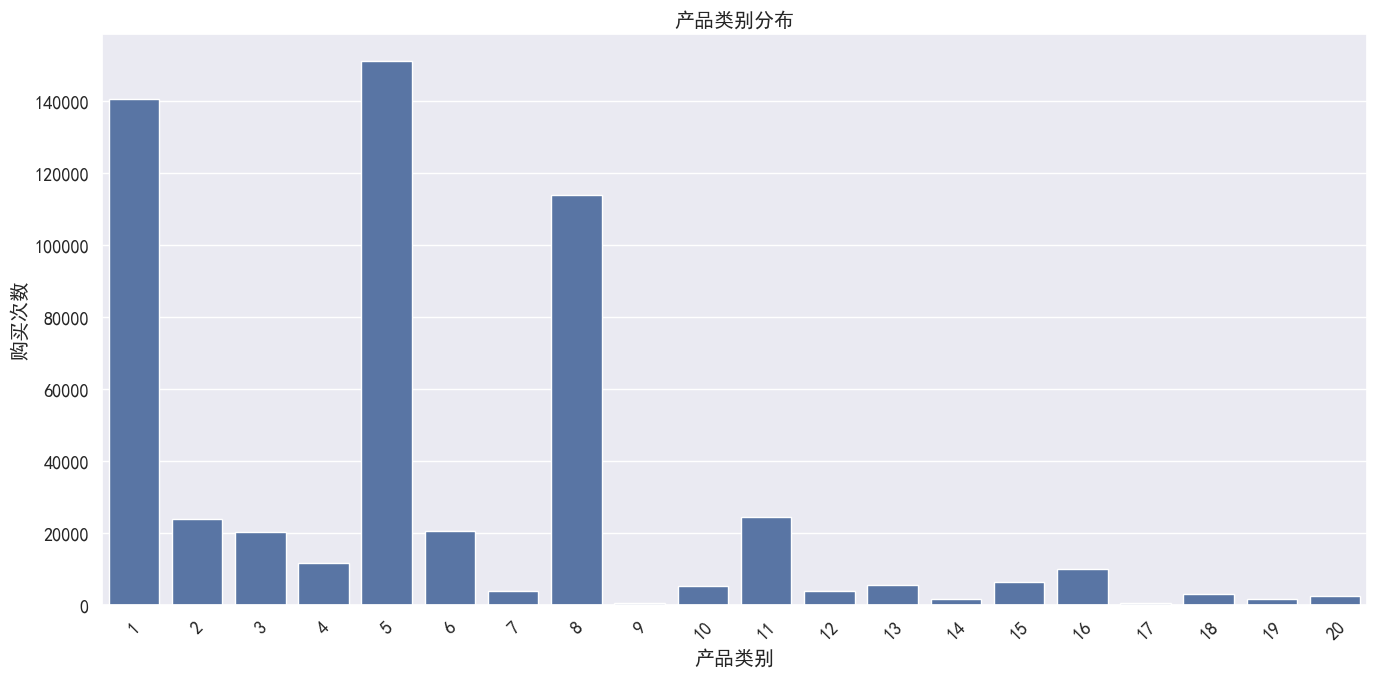

In [33]:
plt.figure(figsize=(14, 7))
category_counts = df['Product_Category'].value_counts().sort_index()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('产品类别分布')
plt.xlabel('产品类别')
plt.ylabel('购买次数')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visualizations/product_category_distribution.png')
plt.show()

### 3.3.2 产品类别与购买金额关系

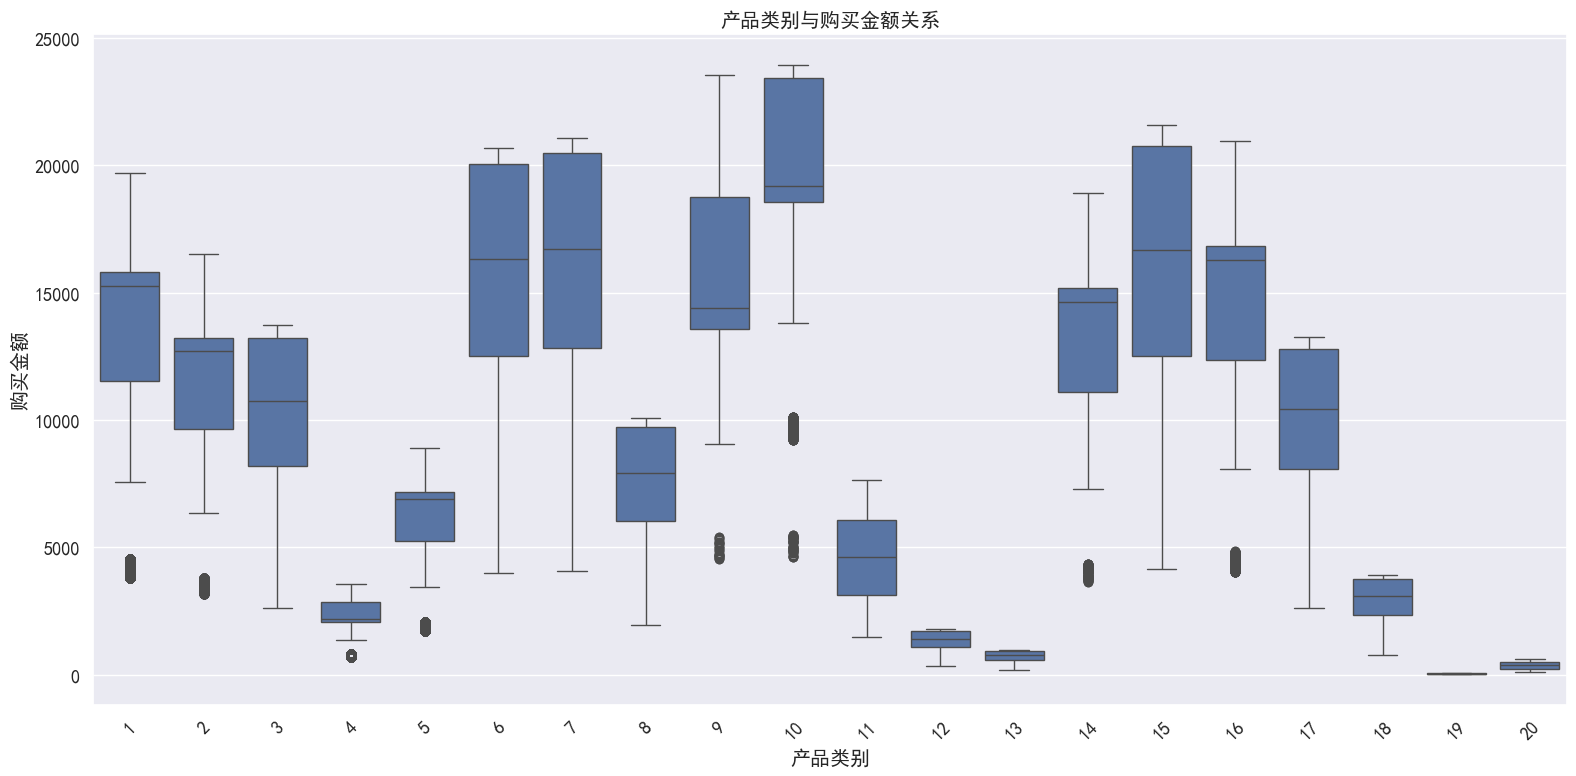

In [34]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Product_Category', y='Purchase', data=df)
plt.title('产品类别与购买金额关系')
plt.xlabel('产品类别')
plt.ylabel('购买金额')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visualizations/purchase_by_product_category.png')
plt.show()

## 3.4 热力图：变量相关性分析

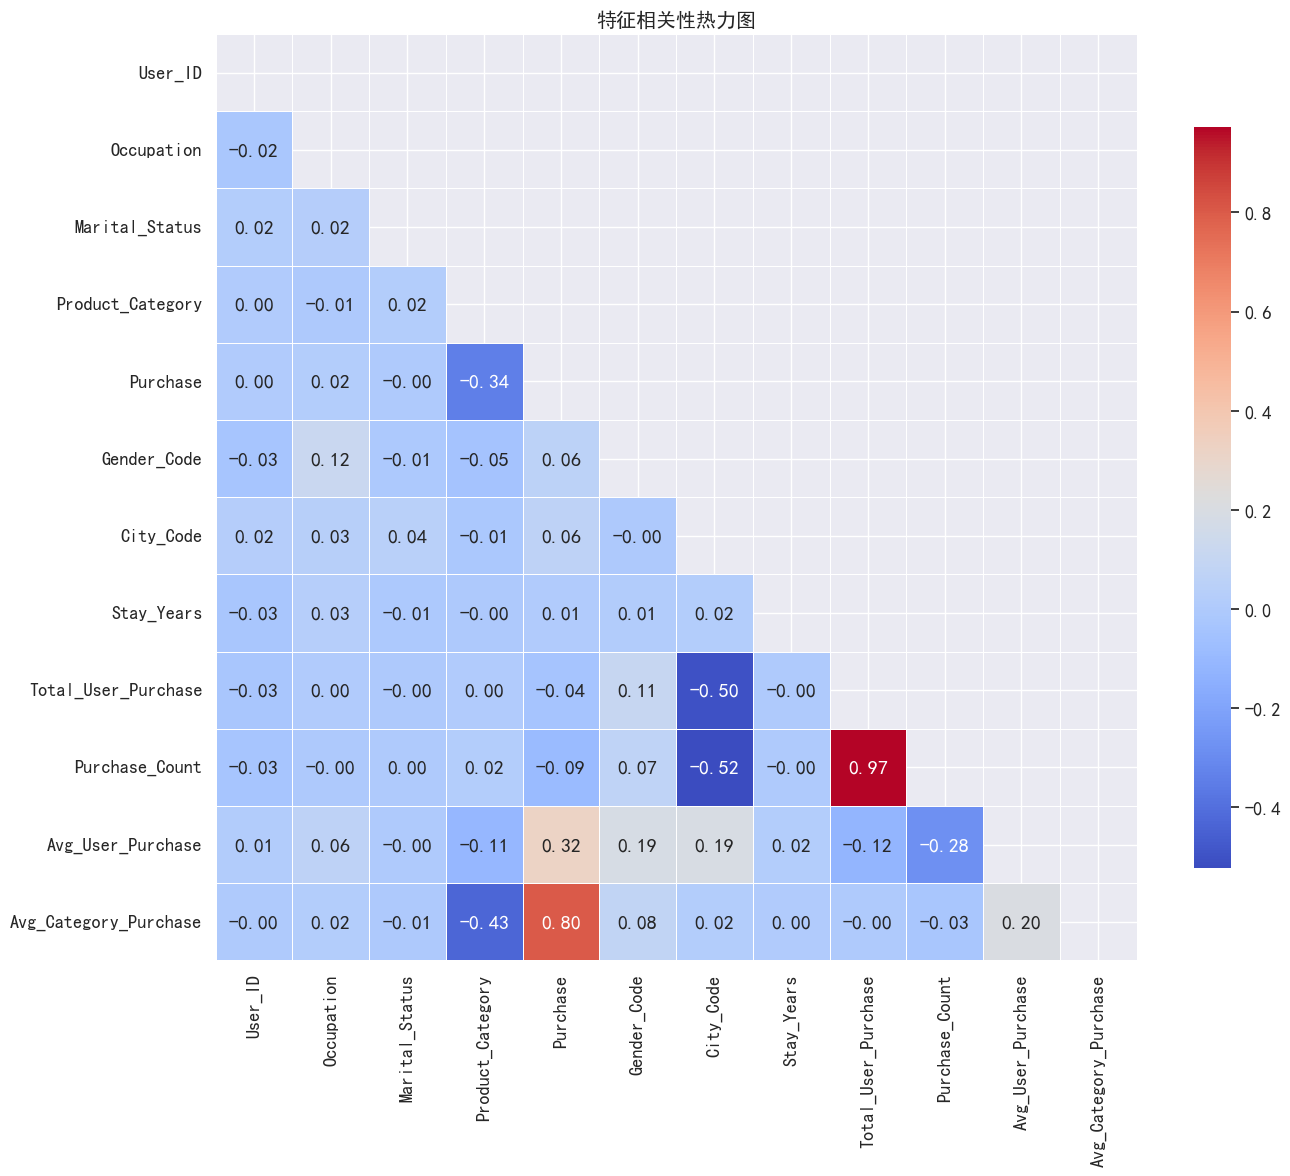

In [35]:
plt.figure(figsize=(14, 12))
# 选择数值型变量
numeric_cols = ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category', 'Purchase', 
                'Gender_Code', 'City_Code', 'Stay_Years', 'Total_User_Purchase', 
                'Purchase_Count', 'Avg_User_Purchase', 'Avg_Category_Purchase']
corr_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", 
           linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('特征相关性热力图')
plt.tight_layout()
plt.savefig('visualizations/correlation_heatmap.png')
plt.show()

## 3.5 用户购买行为模式

### 3.5.1 用户购买频次分布

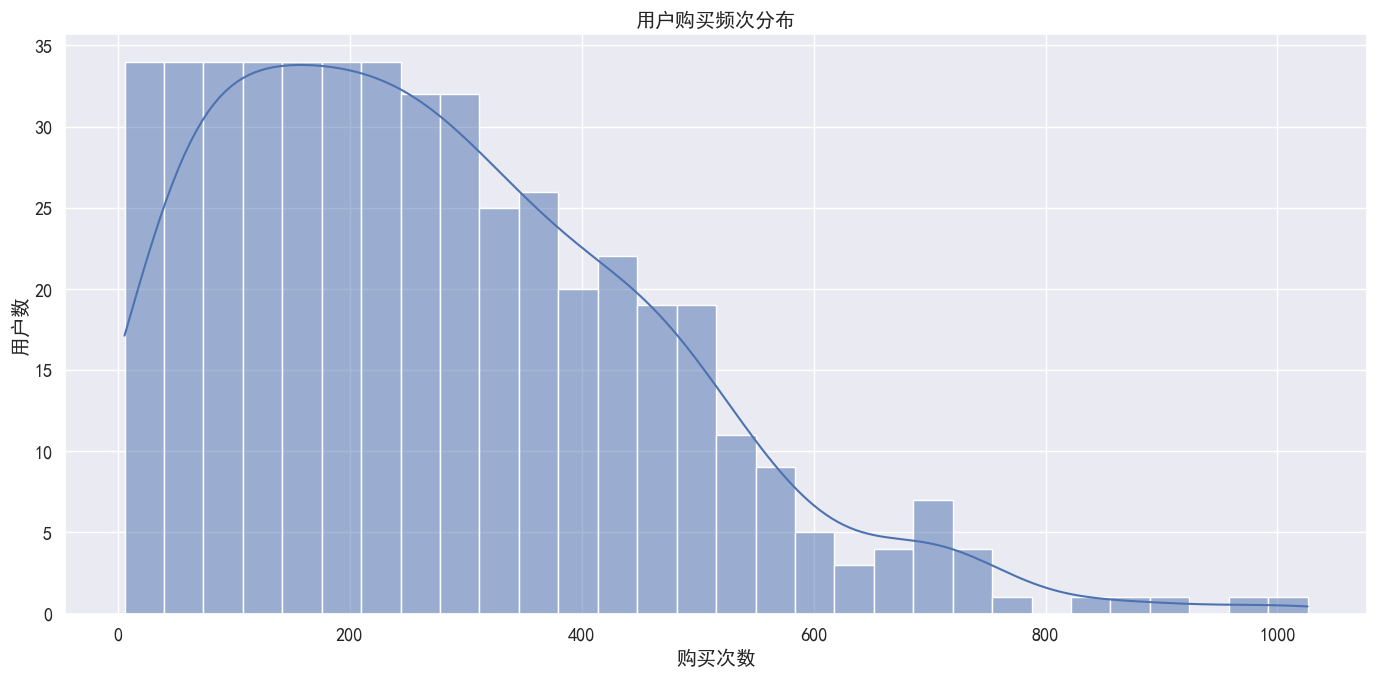

In [36]:
plt.figure(figsize=(14, 7))
sns.histplot(df['Purchase_Count'].unique(), bins=30, kde=True)
plt.title('用户购买频次分布')
plt.xlabel('购买次数')
plt.ylabel('用户数')
plt.tight_layout()
plt.savefig('visualizations/user_purchase_frequency.png')
plt.show()

### 3.5.2 用户平均购买金额分布

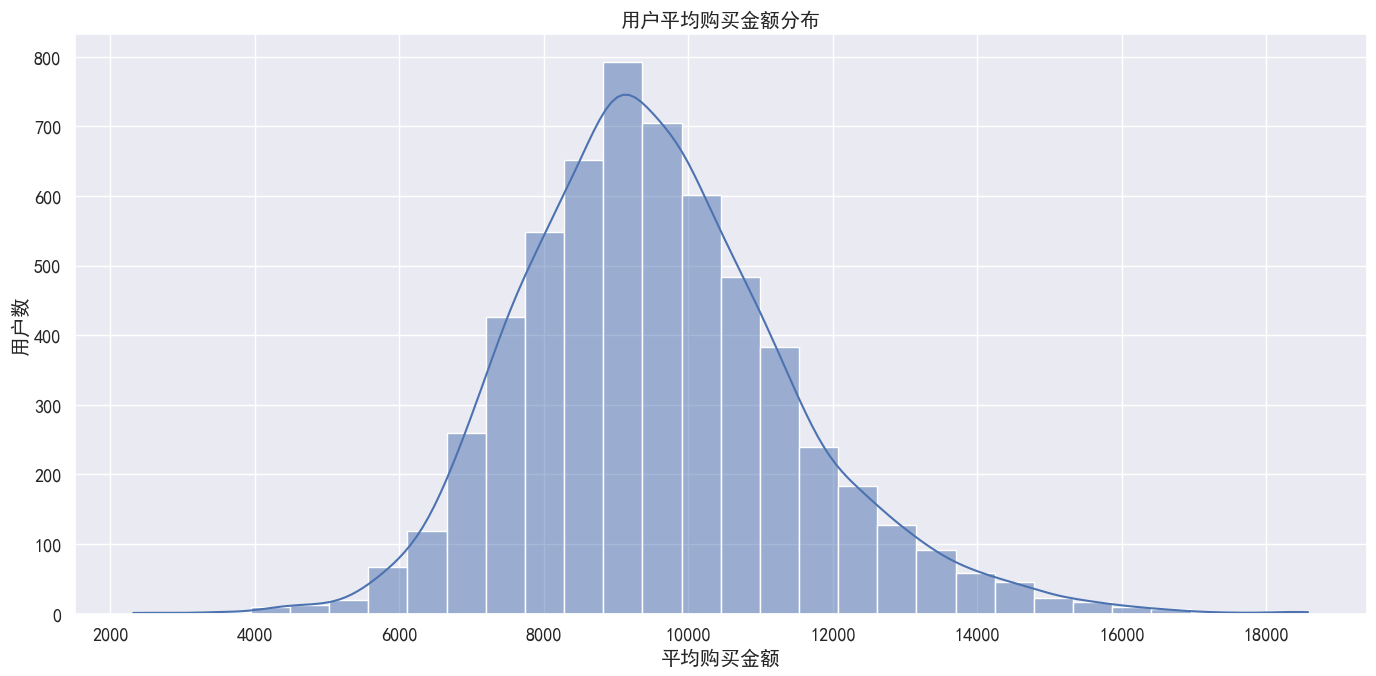

In [37]:
plt.figure(figsize=(14, 7))
user_avg = df.drop_duplicates('User_ID')
sns.histplot(user_avg['Avg_User_Purchase'], bins=30, kde=True)
plt.title('用户平均购买金额分布')
plt.xlabel('平均购买金额')
plt.ylabel('用户数')
plt.tight_layout()
plt.savefig('visualizations/user_avg_purchase.png')
plt.show()

## 3.6 多维分析

### 3.6.1 城市、性别和购买金额的关系

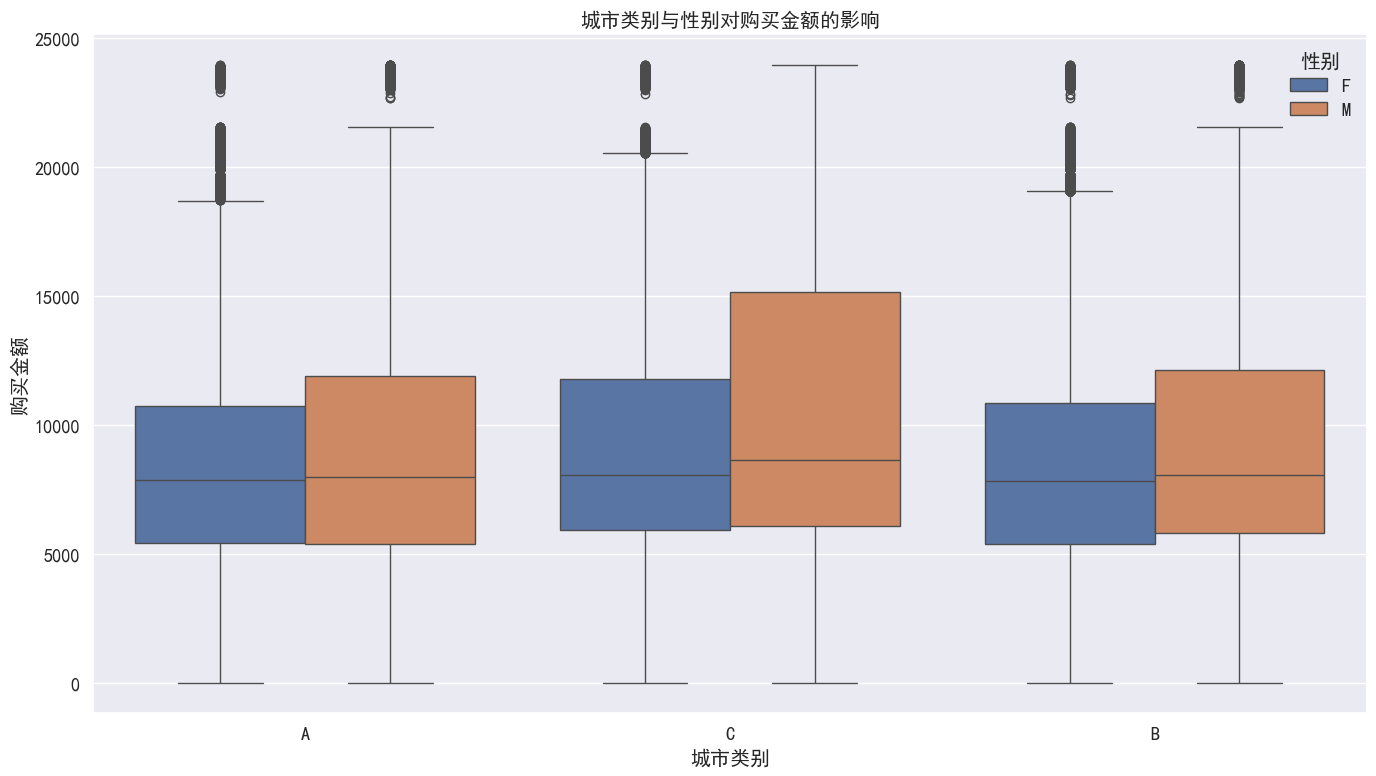

In [38]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='City_Category', y='Purchase', hue='Gender', data=df)
plt.title('城市类别与性别对购买金额的影响')
plt.xlabel('城市类别')
plt.ylabel('购买金额')
plt.legend(title='性别')
plt.tight_layout()
plt.savefig('visualizations/city_gender_purchase.png')
plt.show()

### 3.6.2 年龄、婚姻状况与购买金额关系

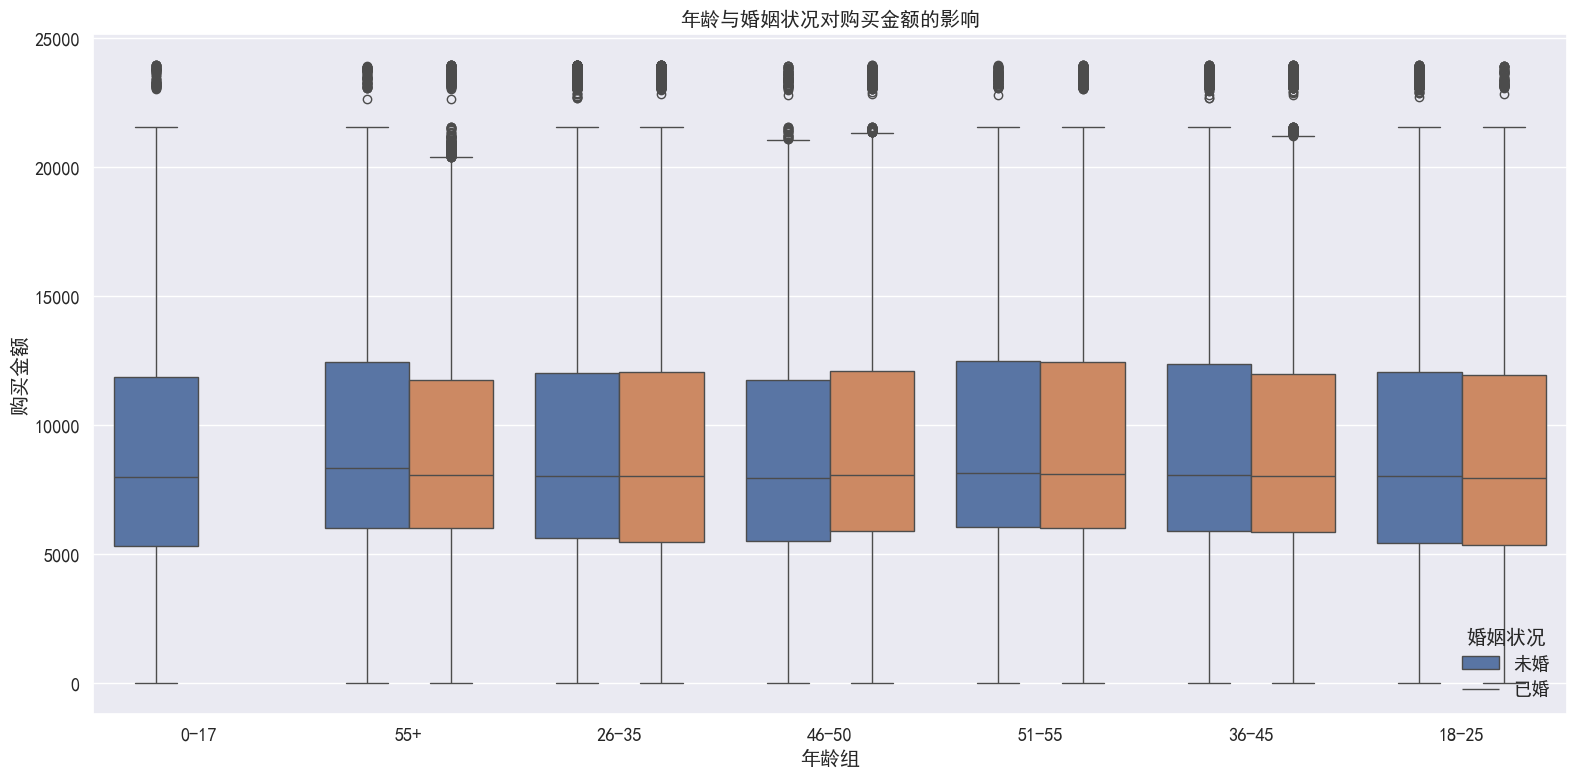

In [39]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Age', y='Purchase', hue='Marital_Status', data=df)
plt.title('年龄与婚姻状况对购买金额的影响')
plt.xlabel('年龄组')
plt.ylabel('购买金额')
plt.legend(title='婚姻状况', labels=['未婚', '已婚'])
plt.tight_layout()
plt.savefig('visualizations/age_marital_purchase.png')
plt.show()

## 3.7 时间维度分析（基于城市居住年限）

C:\Users\avawa\AppData\Local\Temp\ipykernel_19128\3492401784.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Stay_Years', y='Purchase', data=df, ci=None, marker='o', estimator='mean')


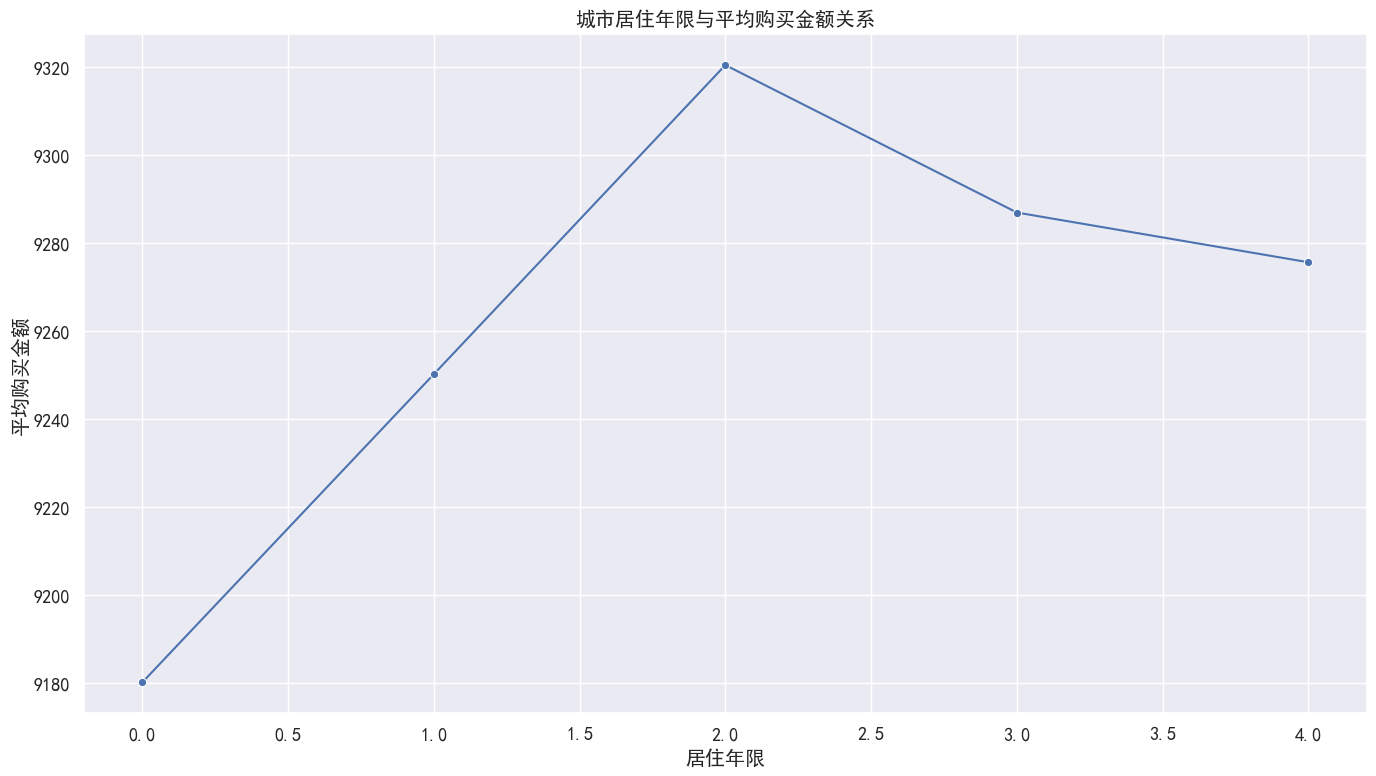

In [40]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Stay_Years', y='Purchase', data=df, ci=None, marker='o', estimator='mean')
plt.title('城市居住年限与平均购买金额关系')
plt.xlabel('居住年限')
plt.ylabel('平均购买金额')
plt.tight_layout()
plt.savefig('visualizations/stay_years_purchase.png')
plt.show()

## 3.8 职业与购买行为分析

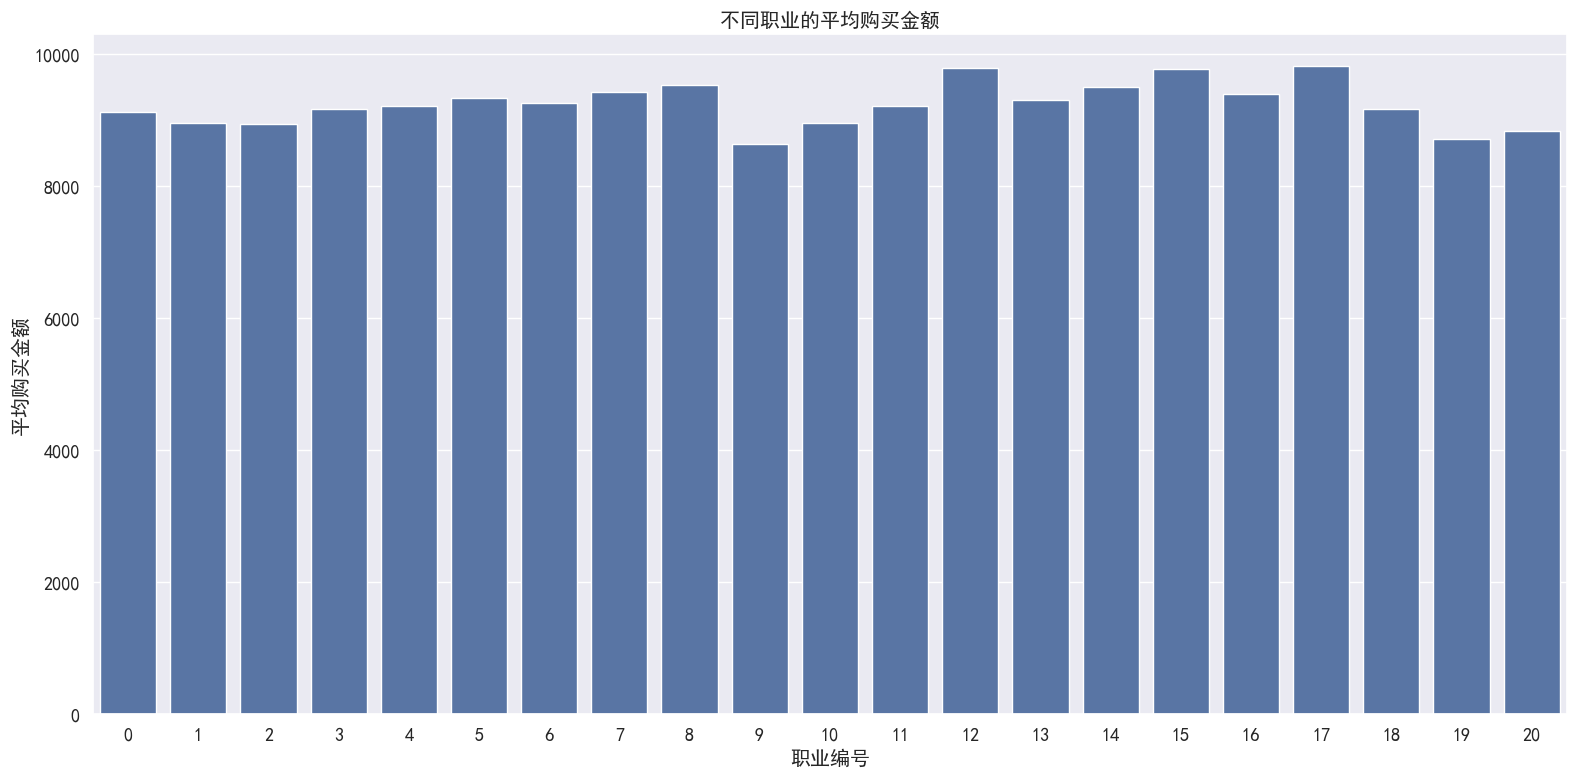

In [41]:
# 获取每种职业的平均购买金额
occupation_purchase = df.groupby('Occupation')['Purchase'].mean().sort_values(ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(x=occupation_purchase.index, y=occupation_purchase.values)
plt.title('不同职业的平均购买金额')
plt.xlabel('职业编号')
plt.ylabel('平均购买金额')
plt.tight_layout()
plt.savefig('visualizations/occupation_purchase.png')
plt.show()

## 3.9 用户细分可视化

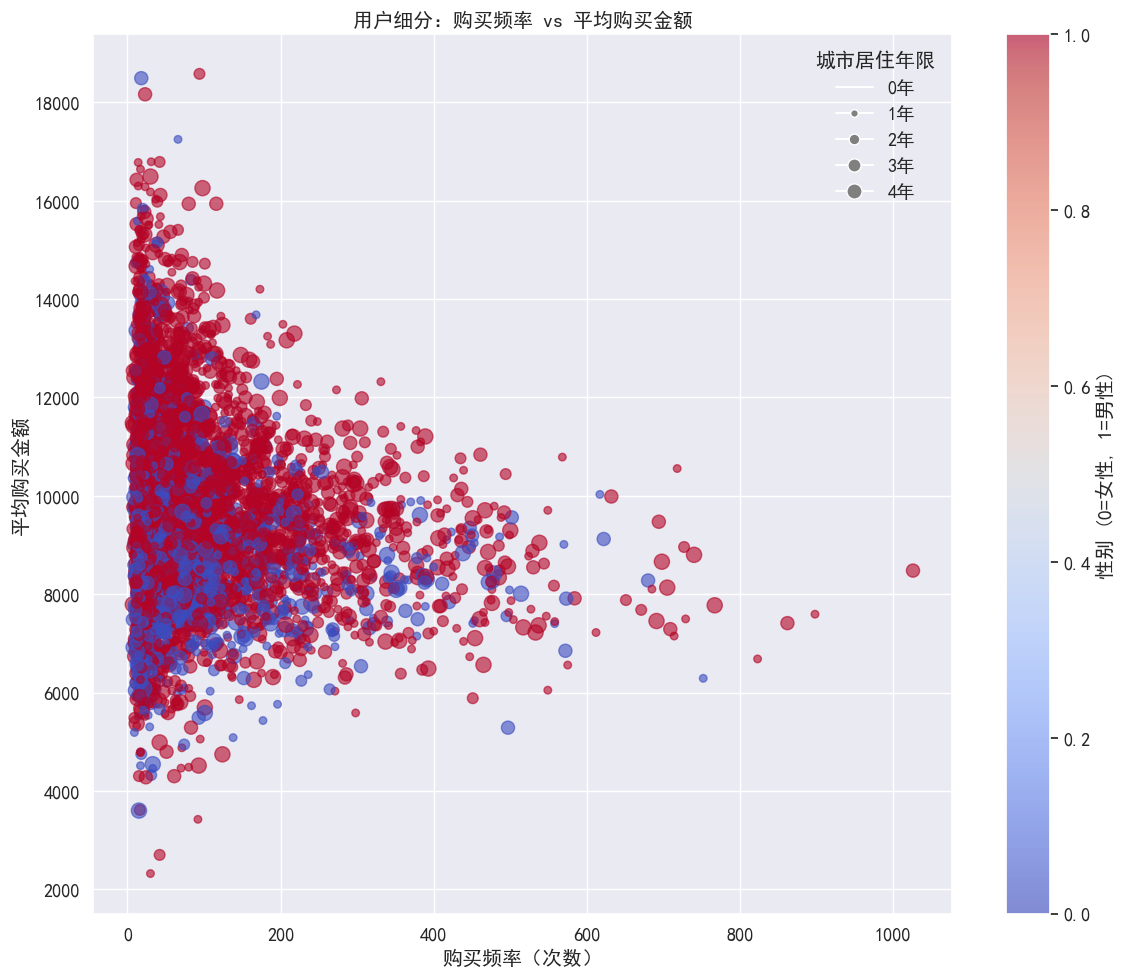

In [42]:
# 只保留每个用户的一行记录
user_segments = df.drop_duplicates('User_ID')
plt.figure(figsize=(12, 10))
# 使用散点图展示用户细分
scatter = plt.scatter(x=user_segments['Purchase_Count'], 
                     y=user_segments['Avg_User_Purchase'],
                     c=user_segments['Gender_Code'],
                     s=user_segments['Stay_Years']*30,
                     alpha=0.6, 
                     cmap='coolwarm')
plt.colorbar(scatter, label='性别 (0=女性, 1=男性)')
plt.title('用户细分：购买频率 vs 平均购买金额')
plt.xlabel('购买频率（次数）')
plt.ylabel('平均购买金额')

# 添加大小图例
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          markerfacecolor='gray', markersize=np.sqrt(30*i), 
                          label=f'{i}年') for i in range(0, 5)]
plt.legend(handles=legend_elements, title='城市居住年限')

plt.tight_layout()
plt.savefig('visualizations/user_segmentation.png')
plt.show()

## 3.10 RFM分析可视化

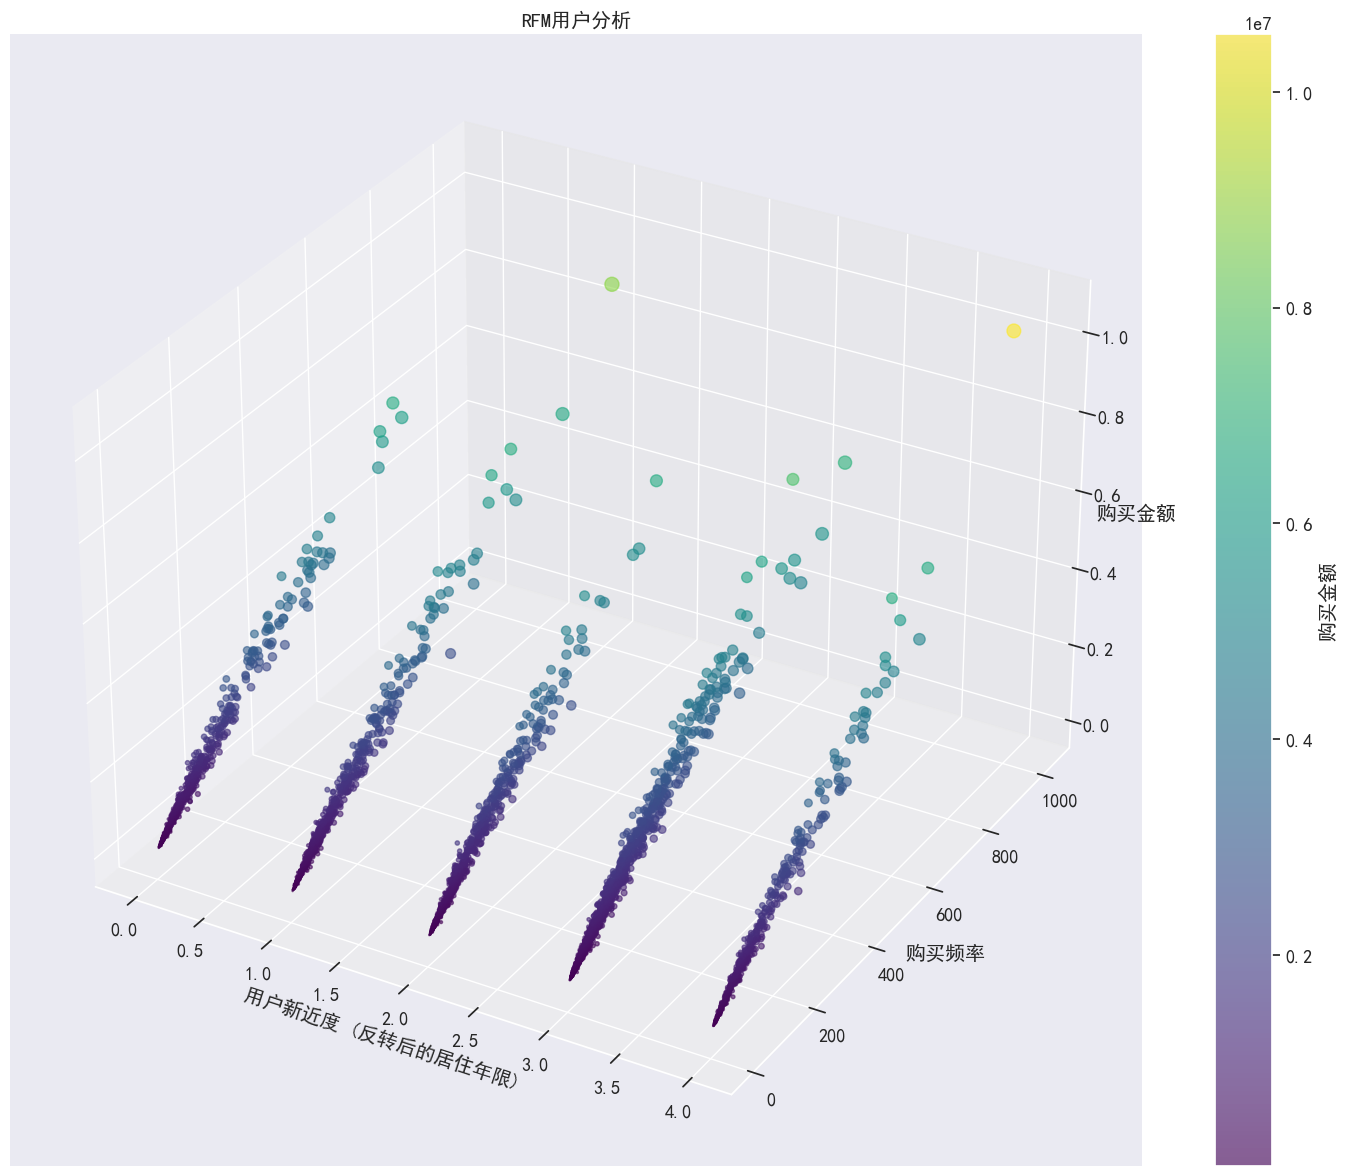

In [43]:
# 在这种情况下，我们没有真正的时间维度，但可以使用城市居住年限作为替代
# R(Recency): 假设Stay_Years越小，表示越"新"的客户
# F(Frequency): Purchase_Count 购买频次
# M(Monetary): Total_User_Purchase 总购买金额

# 提取唯一用户进行RFM分析
rfm_data = df.drop_duplicates('User_ID')[['User_ID', 'Stay_Years', 'Purchase_Count', 'Total_User_Purchase']]
rfm_data.columns = ['User_ID', 'Recency', 'Frequency', 'Monetary']
# 反转Recency，使得数值越小表示越近期
rfm_data['Recency'] = 4 - rfm_data['Recency']

# 创建3D散点图
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
scatter = ax.scatter(rfm_data['Recency'], 
                     rfm_data['Frequency'], 
                     rfm_data['Monetary'],
                     c=rfm_data['Monetary'],
                     s=rfm_data['Frequency']/10,
                     alpha=0.6,
                     cmap='viridis')
                     
plt.colorbar(scatter, ax=ax, label='购买金额')
ax.set_xlabel('用户新近度 (反转后的居住年限)')
ax.set_ylabel('购买频率')
ax.set_zlabel('购买金额')
ax.set_title('RFM用户分析')

plt.tight_layout()
plt.savefig('visualizations/rfm_analysis.png')
plt.show()